<a href="https://colab.research.google.com/github/gaminokstephanie/hw1/blob/main/stephanieg_of_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Kaggle titanic challenge

See https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission

On the features see: https://www.kaggle.com/c/titanic/data

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

loading dataset ^

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
returns the head / first few lines of the data ^ 
took away comment ^

# EDA

In [ ]:
all_data = train.append(test)

adding to test dataset ^

In [ ]:
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


survival = one hot encoding ^
1= survived 
0 = didnt survive :( 

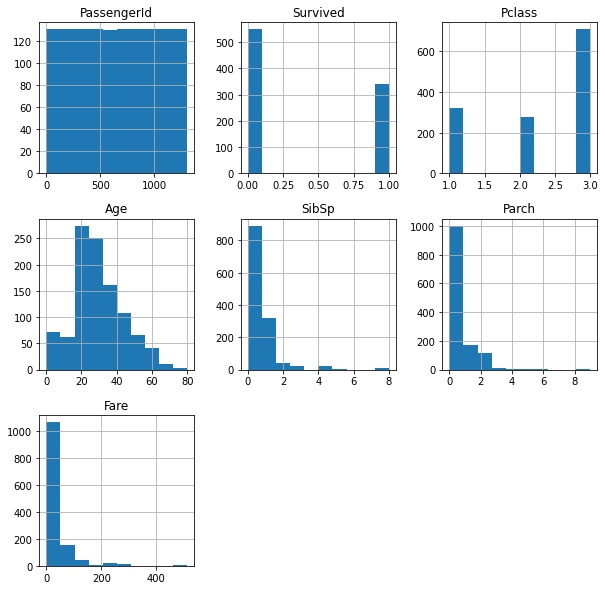

In [ ]:
all_data.hist(figsize=(10,10));

demographics of those on titanic, you can see the peak in ages. there were many passengers ranging from 20-50 years of age. ^

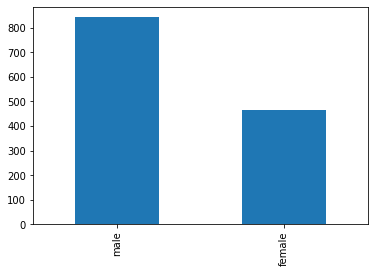

In [ ]:
all_data['Sex'].value_counts().plot(kind='bar');

In [ ]:
using a bar graph to see the difference in how many women and men were on the ship ^

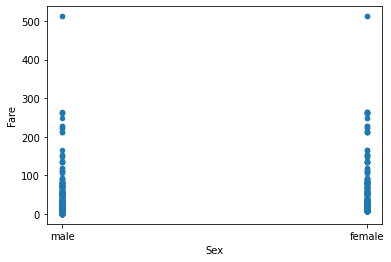

In [ ]:
# Try different column names here
#all_data[['Age']].boxplot(return_type='dict'); 

all_data.plot.scatter(x='Sex',
                      y='Fare',
                      colormap='viridis')

using a scatter plot to see the difference in gender pay, not much difference

## Graphs by survival status

In [50]:
male = all_data.loc[all_data.Sex == 'male']["Survived"]
rate_male = sum(male)/len(male)

print("% of males who survived:", rate_male)

% of males who survived: nan


In [ ]:
got this code from kaggle to calculate male surival and wanted to compare it to womens survival but not sure why its not working /; ^

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 1728x288 with 0 Axes>

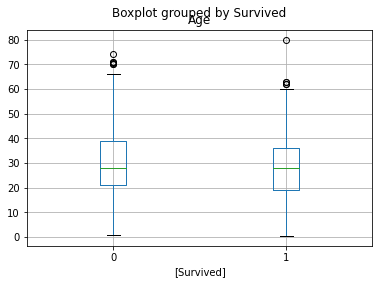

In [55]:
plt.figure(1,figsize=(24,4));
train.boxplot(column=[ "Age"], by=["Survived"], return_type='dict');

messed around and used the column age and sorted by survived to see if there were a signgicance in age differnece in those who didnt and did survive. ^

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


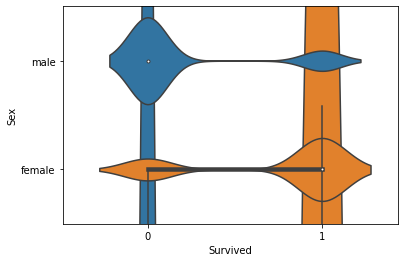

In [58]:
ax = sns.violinplot("Survived", "Age" ,figsize=(8,6), data = train)
ay = sns.violinplot("Survived", "Sex" ,figsize=(8,6), data = train)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


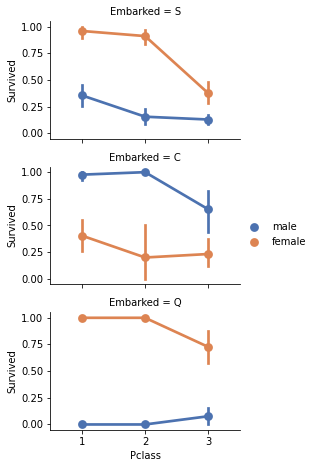

In [89]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(all_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [93]:
#with this we can see the correlation b/w sex, survived and embarked, which leads us to see that higher paying fares did have a positive correlation wiht survial and embarked
#i got this code from kaggle  ^


you can see in the violen graph that there were more ment that didnt survive and more women did surive. ^

In [ ]:
# plt.figure(0);
# sns.set_style("whitegrid");
# ax = sns.violinplot("Survived", "Age" ,figsize=(8,6), data = train);

# plt.figure(1);
# sns.set_style("whitegrid");
# ax = sns.violinplot("Survived", "Embarked" ,figsize=(8,6), data = train);

# plt.figure(2);
# sns.set_style("whitegrid");
# ax = sns.violinplot("Survived", "Fare" ,figsize=(8,6), data = train);

# plt.figure(3);
# sns.set_style("whitegrid");
# ax = sns.violinplot("Survived", "Pclass" ,figsize=(8,6), data = train);

# plt.figure(4);
# sns.set_style("whitegrid");
# ax = sns.violinplot("Survived", "Sex" ,figsize=(8,6), data = train);

# plt.figure(5);
# sns.set_style("whitegrid");
# ax = sns.violinplot("Survived", "SibSp" ,figsize=(8,6), data = train);

# plt.figure(6);
# sns.set_style("whitegrid");
# ax = sns.violinplot("Survived", "Parch" ,figsize=(8,6), data = train);

# Wrangle

In [62]:
# Choose basic features to use in model
train_in = train[['Age','SibSp','Fare']]
test_in = test[['Age','SibSp','Fare']]

In [63]:
# One-hot to make a few new features
train_in = train_in.join(pd.get_dummies(train['Pclass']))
train_in = train_in.join(pd.get_dummies(train['Sex']))
train_in = train_in.join(pd.get_dummies(train['Embarked']))

test_in = test_in.join(pd.get_dummies(test['Pclass']))
test_in = test_in.join(pd.get_dummies(test['Sex']))
test_in = test_in.join(pd.get_dummies(test['Embarked']))

In [67]:
# Get rid of na's
train_in = train_in.fillna(-1)
test_in = test_in.fillna(-1)

In [68]:
# Rescale a few features so they are between 0 and 1
scaler = MinMaxScaler()
train_in[['Age', 'Fare']] = scaler.fit_transform(train_in[['Age', 'Fare']])
test_in[['Age', 'Fare']] = scaler.fit_transform(test_in[['Age', 'Fare']])

In [69]:
# Make the target column
targets = train['Survived']
targets.shape

(891,)

# Create the classifier

In [ ]:
svm_linear = svm.SVC(kernel='linear', C=1,gamma='auto')

In [ ]:
svm_linear.fit(train_in.values, targets.values)
cv_score = cross_val_score(svm_linear, train_in.values, targets.values, cv=5, scoring = 'accuracy');
print(svm_linear, "\n")
print("CV Score:",cv_score, "\n")

SVC(C=1, gamma='auto', kernel='linear') 

CV Score: [0.80446927 0.80337079 0.78651685 0.75280899 0.78651685] 



In [80]:
# The predictions about survival made by the model
predictions = svm_linear.predict(test_in.values)

# Prep data to submit

In [70]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

In [71]:
submission.to_csv("submission.csv", index=False)